# Определение перспективного тарифа для телеком-компании

## Описание проекта

В целях корректировки рекламного бюджета коммерческому департаменту федерального оператора сотовой связи требуется определить, какой тариф приносит больше денег.

**Цель исследования -  проанализировать поведение клиентов и сделать вывод — какой тариф лучше с точки зрения окупаемости затрат на рекламную кампанию.** 

Задачи исследования:
1. выполнить предварительный анализ тарифов на небольшой выборке клиентов (данные 500 пользователей телеком-компании: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год)
2. проверить гипотезы:
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

*Ход исследования:*
- Предобработка данных
- Исследовательский анализ данных
- Проверка гипотез
- Общий вывод

## Шаг 1. Открытие и ознакомление с данными 

In [1]:
#подключим необходимые для работы с данными библиотеки
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#откроем данные и ознакомимся с общей информацией 
try:
    users = pd.read_csv('C:\\Users\\1\\Documents\\датасеты\\users.csv')
except:
    users = pd.read_csv('/datasets/users.csv')

users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [3]:
#узнаем количество абонентов в выборке
len(users['user_id'].unique())

500

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
try:
    calls = pd.read_csv('C:\\Users\\1\\Documents\\датасеты\\calls.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')

calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
try:
    messages = pd.read_csv('C:\\Users\\1\\Documents\\датасеты\\messages.csv')
except:
    messages = pd.read_csv('/datasets/messages.csv')

messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [8]:
try:
    internet = pd.read_csv('C:\\Users\\1\\Documents\\датасеты\\internet.csv')
except:
    internet = pd.read_csv('/datasets/internet.csv')

internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
try:
    tariffs = pd.read_csv('C:\\Users\\1\\Documents\\датасеты\\tariffs.csv')
except:
    tariffs = pd.read_csv('/datasets/tariffs.csv')

tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


## Шаг 2. Подготовка данных

### Приведем данные к нужным типам
Для дальнейшей обработки данных в таблицах  со звонками, сообщениями, интренет трафиком пользователей необходимо привести данные в столбцах с датой к типу datetime

In [12]:
#изменим тип данных в таблице calls в столбце call_date
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [13]:
#изменим тип данных в таблице messages в столбце message_date
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [14]:
#изменим тип данных в таблице internet в столбце session_date
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


### Проверка данных на ошибки 
Для дальнейшей работы с данными следует исключить наличие ошибок.

В таблице с данными пользователей необходимо проверить наличие:
- явных дубликатов
- в столбцах сity и tariff скрытых дубликатов 


In [15]:
#проверим на наличие дубликатов таблицу с данными пользователей
users.duplicated().sum()

0

In [16]:
#проверим столбец сity на наличие скрытых дубликатов
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [17]:
#проверим столбец tariff на наличие скрытых дубликатов
users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

#### Вывод 
Явные и скрытые дубликаты не обнаружены. 


### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [18]:
#добавим в таблицу calls столбец с месяцем 
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
#calls['month'] =calls['call_date'].astype('datetime64[M]')
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [19]:
#округлим данные звонков до минут
calls['duration'] = np.ceil(calls['duration'])
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [20]:
#сгруппируем данные по id абонента и количеству потраченных минут в месяц
calls_per_month = (calls
                   .groupby(['user_id','month']).agg({'duration': ['sum', 'count']})
                   .reset_index()
                  )
calls_per_month.columns = ['user_id','month','total_calls_duration', 'calls']
calls_per_month.head()

,user_id,month,total_calls_duration,calls
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58


### Количество отправленных сообщений по месяцам

In [21]:
#добавим в таблицу messages столбец с месяцем 
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [22]:
#сгруппируем данные по id абонента и количеству отправленных sms в месяц
messages_per_month = (messages
                      .groupby(['user_id', 'month']).agg({'message_date': 'count'})
                      .rename(columns = {'message_date': 'messages'})
                      .reset_index()
                     )
messages_per_month.head()

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Объем израсходованного интернет-трафика по месяцам

In [23]:
#добавим в таблицу internet столбец с месяцем 
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


In [24]:
#сгруппируем данные по id абонента и израсходованному трафику в месяц
internet_per_month = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
internet_per_month.head()



,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


### Помесячная выручка с каждого пользователя

In [25]:
#объединим таблицы с данными о звонках, смс, интернет-трафике, пользователях и тарифах 
calls_per_month = calls_per_month[['user_id','month','total_calls_duration']].copy()
df = (calls_per_month
      .merge(messages_per_month, on=['user_id', 'month'], how='outer')
      .merge(internet_per_month, on=['user_id', 'month'], how='outer')
     )
df = (df
      .merge(users, on='user_id', how='outer')
      .merge(tariffs, left_on='tariff', right_on='tariff_name',  how='left')
      .fillna(0)
     )
display(df.head())
#проверим все ли абоненты остались после объединения таблиц 
len(df['user_id'].unique())

,user_id,month,total_calls_duration,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5.0,159.0,22.0,2253.49,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6.0,172.0,60.0,23233.77,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7.0,340.0,75.0,14003.64,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8.0,408.0,81.0,14055.93,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9.0,466.0,57.0,14568.91,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


500

In [26]:
#напишем функцию для подсчета помесячной выручки с каждого пользователя
def get_revenue(row_values):
    calls_over = (row_values['total_calls_duration'] - row_values['minutes_included']) * row_values['rub_per_minute']
    messages_over = (row_values['messages'] - row_values['messages_included']) * row_values['rub_per_message']
    gd_over = np.ceil((row_values['mb_used'] - row_values['mb_per_month_included'])/1024) * row_values['rub_per_gb']
    
    if calls_over < 0: calls_over = 0
    if messages_over < 0: messages_over = 0
    if gd_over < 0: gd_over = 0
    
    return row_values['rub_monthly_fee'] + calls_over +  messages_over + gd_over
        
#применим к выборке функцию get_revenue()
df['revenue'] = df.apply(get_revenue, axis = 1)
df

,user_id,month,total_calls_duration,messages,mb_used,age,churn_date,city,first_name,last_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,revenue
0,1000,5.0,159.0,22.0,2253.49,52,0,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
1,1000,6.0,172.0,60.0,23233.77,52,0,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
2,1000,7.0,340.0,75.0,14003.64,52,0,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
3,1000,8.0,408.0,81.0,14055.93,52,0,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
4,1000,9.0,466.0,57.0,14568.91,52,0,Краснодар,Рафаил,Верещагин,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,0.0,21.0,19559.44,35,0,Санкт-Петербург,Павел,Гончаров,...,smart,50,15360,500,550,200,3,3,smart,1550.0
3212,1489,11.0,0.0,20.0,17491.56,35,0,Санкт-Петербург,Павел,Гончаров,...,smart,50,15360,500,550,200,3,3,smart,1150.0
3213,1489,12.0,0.0,35.0,17322.51,35,0,Санкт-Петербург,Павел,Гончаров,...,smart,50,15360,500,550,200,3,3,smart,950.0
3214,1128,0.0,0.0,0.0,0.00,51,2018-12-23,Волжский,Ксения,Агаева,...,ultra,1000,30720,3000,1950,150,1,1,ultra,1950.0


## Шаг 3. Исследовательский анализ данных

In [27]:
#найдем среднее количество, дисперсию и стандартное отклонение для минут разговора,сообщений и интернет-трафика тарифов ультра и смарт
(df
 .groupby('tariff')
 .agg({'total_calls_duration':['mean','var','std'], 'messages':['mean','var','std'], 'mb_used':['mean','var','std'], 'revenue':['mean','var','std']})
 .style.format("{:.0f}")
)


In [28]:
#проверим корректность расчета дисперсии на примере расчета дисперсии для среднеего значения минут 
smart = df.loc[df['tariff']=='smart', 'total_calls_duration']
variance_estimate = np.var(smart, ddof=1)
variance_estimate

36281.39383644458

In [29]:
#посмотрим также на минимальные и максимальные значения, квартили
df_smart = df.query('tariff == "smart"')
df_smart.describe()

,user_id,month,total_calls_duration,messages,mb_used,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.0,2230.0,2230.0,2230.0,2230.0,2230.0,2230.0,2230.000000
mean,1246.562332,8.343049,417.747534,33.369058,16201.118655,46.557848,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1289.641704
std,146.110501,2.925006,190.476754,28.230396,5879.187315,16.349865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,818.370799
min,1001.000000,0.000000,0.000000,0.000000,0.000000,18.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
25%,1121.000000,6.000000,282.000000,10.000000,12630.035000,32.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
50%,1240.000000,9.000000,421.500000,28.000000,16505.475000,47.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1021.000000
75%,1376.000000,11.000000,545.000000,51.000000,20042.107500,62.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1750.000000
max,1499.000000,12.000000,1435.000000,143.000000,38552.450000,75.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,6770.000000


In [30]:
df_ultra = df.query('tariff == "ultra"')
df_ultra.describe()

,user_id,month,total_calls_duration,messages,mb_used,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.0,986.0,986.0,986.0,986.0,986.0,986.0,986.000000
mean,1262.957404,8.242394,526.089249,49.313387,19449.059970,46.838742,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,2070.030426
std,140.689268,2.882305,317.887549,47.806040,10101.095459,17.099807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,376.015578
min,1000.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
25%,1143.000000,6.000000,282.500000,6.000000,11748.585000,30.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
50%,1277.000000,9.000000,518.000000,38.000000,19304.020000,45.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
75%,1381.000000,11.000000,751.750000,78.750000,26835.885000,63.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
max,1495.000000,12.000000,1673.000000,224.000000,49745.690000,75.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,4800.000000


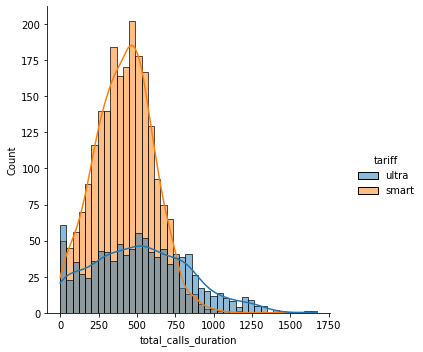

In [31]:
#построим гистограммы для оценки распределения значений 
sns.displot(x='total_calls_duration',
            hue='tariff',
            kde=True,
            fill=True,
            data=df)

Гистограммы имеют относительно симметричную форму. Похожи на нормальное распределение, с пиком в центре. Однако имеют усечение слева. Согласно графику средние значения количества минут разговора у пользователей двух тарифов совпадают и равны примерно 500. 

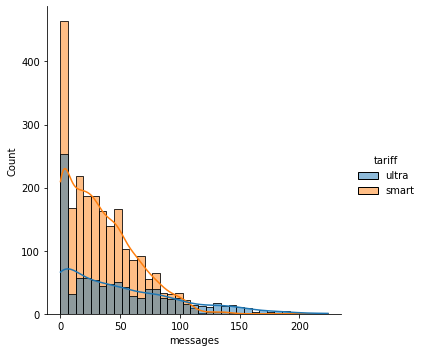

In [32]:
sns.displot(x='messages',
            hue='tariff',
            kde=True,
            fill=True,
            data=df)

Гистограммы больше похожи на усеченные с пиком в районе 0-5. 

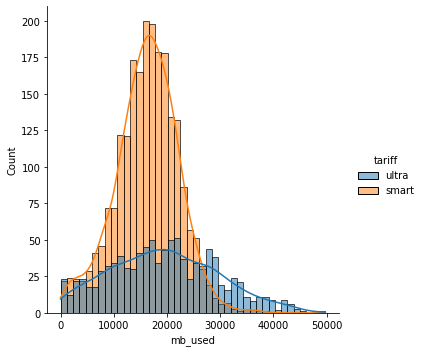

In [33]:
sns.displot(x='mb_used',
            hue='tariff',
            kde=True,
            fill=True,
            data=df)

Гистограммы имеют вид нормального распределения. Для тарифа "смарт" пик приходится 15-16 гб, для тарифа "ультра" в районе 20. Обе гистограммы ииеют усечение слева. 

### Вывод

Согласно полученным данным пользователи тарифа "смарт" в среднем в месяц тратят на разговоры 418 минут, 33 sms  и 15,8 гб интернет-трафика. При этом половина выборки укладывается в тарифный пакет по минутам и сообщениям, и только четверть пользователей из выборки укладываются в лимит по интернет-трафику. 

Пользователи тарифного плана "ультра" в среднем в месяц тратят на разговоры 526 минут, 49 sms  и 20 гб интернет-трафика. Все пользовалители укладываются в отведеный лимит по минутам и сообщениям, а четверть пользователей расходует интернет-трафик сверх лимита. 

Таким образом, чаще дополнительно приобретают пакеты минут, смс и интернет-трафика пользователи тарифа "смарт". 

## Шаг 4. Статистический анализ данных

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
Сформулируем нулевую и альтернативную гипотезу:

-H0: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна;

-Н1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна

Поскольку выборки независимые воспользуемся методом st.ttest_ind()

In [34]:
#подготовим массивы и узнаем их размер
revenue_smart = df.loc[df['tariff']=='smart', 'revenue']
revenue_ultra = df.loc[df['tariff']=='ultra', 'revenue']
print('Размер выборки revenue_smart:', len(revenue_ultra))
print('Размер выборки revenue_ultra:', len(revenue_smart))

Размер выборки revenue_smart: 986
Размер выборки revenue_ultra: 2230


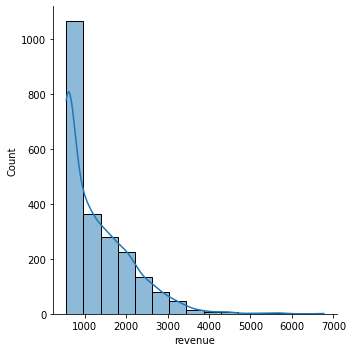

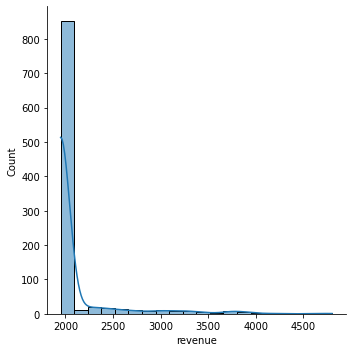

In [35]:
#оценим характер распределения среднего выборки
sns.displot(x=revenue_smart,
            kde=True,
            bins=15,
            fill=True)

sns.displot(x=revenue_ultra,
            kde=True,
            bins=20,
            fill=True)

На графиках отображены усеченные распределения. Пик в графиках приходится на значения 600-700 и около 2000, далее следует резкий обрыв вправо.

In [36]:
#проверим гипотезы
alpha = .05 

results = st.ttest_ind(
    revenue_smart, 
    revenue_ultra,
    equal_var = False  # массивы отличаются размером 
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


### Вывод
Полученное значение p-value говорит о том, что вероятность получить такое различие между средними выручками случайно ниже заданного критерия значимости, поэтому следует, что разница между  средними выручками пользователей таифов смарт и ультра значительная, чтобы принять нулевую гипотезу.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Сформулируем нулевую и альтернативную гипотезу:

-H0: Средняя выручка пользователей из Москвы и пользователей из других регионов равна;

-Н1:  Средняя выручка пользователей из Москвы и пользователей из других регионов не равна.

Поскольку выборки независимые воспользуемся методом st.ttest_ind()

In [37]:
#подготовим массивы и узнаем их размер
revenue_msk = df.loc[df['city']== 'Москва', 'revenue']
revenue_region = df.loc[df['city']!= 'Москва', 'revenue']
print('Размер выборки revenue_msk:',len(revenue_msk))
print('Размер выборки revenue_region:', len(revenue_region))

Размер выборки revenue_msk: 611
Размер выборки revenue_region: 2605


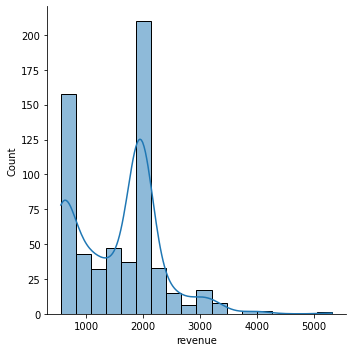

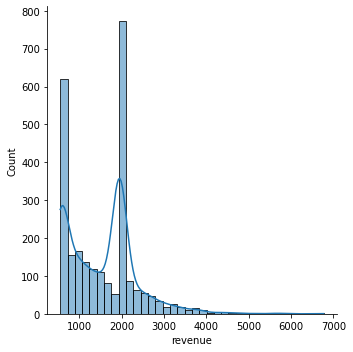

In [38]:
#оценим характер распределения среднего выборки
sns.displot(x=revenue_msk,
            kde=True,
            fill=True)
sns.displot(x=revenue_region,
            kde=True,
            fill=True)

Гистограммы не соответствуют нормальному распределению значений среднего. На двух графиках фиксируется два пика в районе 600-700 и 2000, что в принципе ожидаемо, так как в выборку попали два разных тарифных плана с установленной  стоимостью. 

In [39]:
#проверим гипотезы
alpha = .05 

results = st.ttest_ind(
    revenue_msk, 
    revenue_region,
    equal_var = False  # массивы отличаются размером 
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5216952110000279
Не получилось отвергнуть нулевую гипотезу


### Вывод
Полученное значение p-value говорит о том, что вероятность получить такое различие между средними выручками или больше случайно равна 46 %.  Данная вероятность не позволяет сделать вывод о значимом различии между средними выручками пользователей Москвы и регионов. 

## Шаг 5. Общий вывод


В ходе исследования была проведена следующая работа.

На этапе преобработки данных в таблицах со звонками, сообщениями, интренет-трафиком пользователей значения в столбцах с датой были приведены к типу datetime, также в целях недопущения искажения результатов исследования была осуществлена проверка данных на наличие ошибок.

На этапе исследовательского анализа было описано поведение клиентов телеком-компании. Так, например, было установлено, что пользователи тарифа "смарт" в среднем в месяц тратят на разговоры 418 минут, 33 sms  и 15,8 гб интернет-трафика, при этом половина выборки укладывается в тарифный пакет по минутам и сообщениям, и только четверть пользователей из выборки укладываются в лимит по интернет-трафику. Пользователи тарифного плана "ультра" в среднем в месяц тратят на разговоры 526 минут, 49 sms  и 20 гб интернет-трафика. Все пользовалители тарифного плана "ультра" укладываются в отведенный лимит по минутам и сообщениям, и всего лишь четверть пользователей расходует интернет-трафик сверх лимита. На основании полученных данных, можно сделать вывод, что чаще дополнительно приобретают пакеты минут, смс и интернет-трафика пользователи тарифа "смарт".

На этапе проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (выборки: выручка пользователей тарифа "смарт" и "ультра"; выручка пользователей Москвы и регионов) было установлено, что средняя выручка пользователей тарифов смарт и ультра различается, а средняя выручка пользователей Москвы равна средней выручке пользователям в других регионах.

В качестве критерия был применен t-тест, выбор которого был обусловлен следующими причинами:
- во-первых, для данного критерия отсутствие нормального респределения среднего не является препятствием для проверки гипотез;
- во-вторых, t-тест позволяет осуществить проверку при неравном значении дисперсии. 

Стоит отметить, что несмотря на то, что в среднем выручка от одного пользователя тарифного плана "ультра" выше,чем от пользователя тарифного плана "смарт", пользователи именно этого тарифа приносят компании больше выручки, поскольку чаще не укладываются в бесплатный лимит и вынуждены дополнительно приобретать пакеты минут, смс и интернет-трафика. Также привлечь новых абонентов с тарифом "смарт" проще, так как стоимость абонетской платы ниже.
Таким образом, наиболее привлекательным, с точки зрения окупаемости рекламной кампании, является тарифный план "смарт". 